In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
def Hen_Kr_classic(x0, eps, eps2):
    '''
    Функция, которая итерационно вычисляет эволюцию модели HK
    
    Parameters
    ----------
    x0: ndarray, shape (n,)
        Начальный профиль мнений, состоящий из n агентов
    eps: float
        Радиус доверия
    eps2: float
        Допустимая точность. С её помощью определяется момент остановки эволюции модели
        
    Returns
    -------
    X: list, shape (t, n)
        Итоговая матрица эволюции модели, хранящая в себе данные о "мнениях" агентов 
        в каждый момент времени
    t: float
        Общее время эволюции модели
    '''
    
    X = [np.array(x0)]  # формируем список, в котором будут храниться данные о 'мнениях' агентов
    t = 0  # переменная для подсчёта времени (количества итераций)
    
    # цикл для итерационного вычисления эволюции модели
    while True:  
        X.append(np.zeros(len(x0)))  # на каждой итерации добавляем в список вектор из нулей
        t += 1
        
        # цикл для вычисления мнений агентов на следующей итерации
        for j in range(len(x0)):  
            X[t][j] = new_op_classic(X[t - 1], j, eps)
            
            
#         print(order_parameter(X[t], eps, -1))
        # Условие остановки эволюции; проверяем, что профиль мнений на текущей 
        # и предыдущей итерации отличается меньше, чем на заданную допустимую точность
        if compare(X[t], X[t - 1], eps2):  
            break
    return X, t


def new_op_classic(x, i, eps):
    '''
    Функция, которая вычисляет мнение агента на следующей итерации в модели HK 
    
    Parameters
    ----------
    x: ndarray, shape (n,)
        Профиль мнений на предыдущей итерации, состоящий из n агентов
    i: int
        Индекс агента, для которого считаем новое значение
    eps: float
        Радиус доверия
        
    Returns
    -------
    new_value: float
        Новое "мнение" агента
    '''
    
    count = 1
    summ = x[i]
    
    # проходим по всему профилю мнений
    for k in range(len(x)):  
        if (abs(x[i] - x[k]) <= eps) and (i != k):  # ищем "соседей" данного агента
            summ += x[k]  # суммируем значения всех "соседей" данного агента
            count += 1  # сичтаем количество "соседей"
    new_value = summ/count  # новое "мнение" агента
    return new_value


def compare(x, y, eps2):
    '''
    Функция, которая сравнивает текущую и предыдущую итерацию
    
    Parameters
    ----------
    x: ndarray, shape (n,)
        Профиль мнений на текущей итерации, состоящий из n агентов
    y: ndarray, shape (n,)
        Профиль мнений на предыдущей итерации, состоящий из n агентов
    eps2: float
        Допустимая точность
        
    Returns
    -------
    result: bool
        True, если произошла "заморозка" модели
        False, если "заморозки" не произошло
    '''
    
    result = 1
    for k in range(len(x)):
        if abs(x[k] - y[k]) >= eps2:
            result = 0
    result = bool(result)
    return result


def order_parameter(x, eps, target_ind=-1):
    summary = 0
    n = len(x)
    for i in range(n):
        if i == target_ind:
            continue
        for j in range(n):
            if j != target_ind:
                if abs(x[i]-x[j]) < eps:
                    summary += 1
                else:
                    continue
    if target_ind == -1:
        return summary/(n**2)
    else:
        return summary/((n-1)**2)

def new_op(x, i, eps):
    count = 1
    summ = x[i]
    for k in range(len(x)):
        if (abs(x[i] - x[k]) < eps) and (i != k):
            # print(i, j, x[i], x[j])
            summ += x[k]
            count += 1
    # print(summ, count)
    return summ/count, count

def is_consensus(x, fix):
    for i in range(1, fix):
        if x[i-1] != x[i]:
            return False
    if x[fix - 1] != x[fix + 1]:
        return False
    for i in range(fix + 2, len(x)):
        if x[i-1] != x[i]:
            return False
    return True


def Hen_Kr_classic_statistics(x0, eps, eps2):
    X = [np.array(x0)]
    t = 0
    consensus_value = 0
    consensus_time = 0
    consensus_flag = True
    while True:
        X.append(np.zeros(len(x0)))
        t += 1
        for j in range(len(x0)):
            X[t][j], _ = new_op(X[t - 1], j, eps)
        if consensus_flag and abs(X[t][0] - X[t][-1]) < eps2:
            consensus_flag = False
            consensus_time = t
            consensus_value = X[t][0]
        if compare(X[t], X[t - 1], eps2):
            break
    return X, t, consensus_value, consensus_time

In [3]:
eps = 0.2  # радиус доверия
eps2 = 1e-4  # допустимая точность
n = 50  # количество агентов

In [291]:
x0 = np.random.beta(.5, .5, n)
x0.sort()  # упорядочиваем мнения агентов
x0, x0.mean()

(array([4.69725519e-04, 1.08811226e-03, 5.26027974e-03, 7.53052840e-03,
        7.73047090e-03, 2.77466049e-02, 4.45194496e-02, 4.89158465e-02,
        5.17797880e-02, 5.86614369e-02, 6.98683367e-02, 7.09710936e-02,
        7.21174828e-02, 1.63826600e-01, 1.66691847e-01, 1.79583448e-01,
        2.03095688e-01, 2.15185408e-01, 3.03160090e-01, 3.37011875e-01,
        3.42808639e-01, 3.97000234e-01, 4.25267164e-01, 4.67198466e-01,
        4.90733629e-01, 5.09292349e-01, 5.38068106e-01, 5.48355749e-01,
        6.02090782e-01, 6.07189710e-01, 6.12522725e-01, 6.89213736e-01,
        7.06559794e-01, 7.16244221e-01, 7.35696900e-01, 7.83942111e-01,
        8.14912438e-01, 8.54523144e-01, 9.16532343e-01, 9.40743816e-01,
        9.41132417e-01, 9.44344759e-01, 9.58022206e-01, 9.64604358e-01,
        9.74048600e-01, 9.80572178e-01, 9.81164021e-01, 9.83909527e-01,
        9.91002937e-01, 9.97270930e-01]),
 0.48900364202989643)

In [5]:
X, t = Hen_Kr_classic(x0, eps, eps2)
t

6

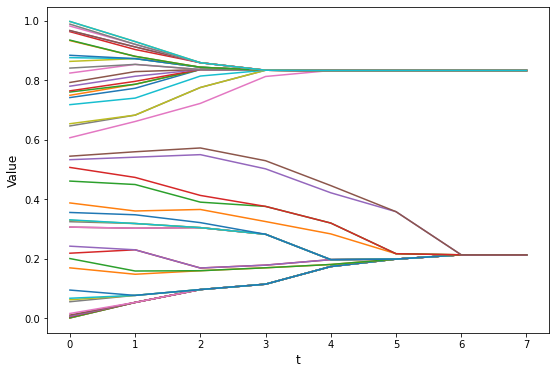

In [292]:
eps = 0.2
x0 = np.random.beta(.5, .5, n)
x0.sort()  # упорядочиваем мнения агентов

X, t = Hen_Kr_classic(x0, eps, eps2)

t_list = np.linspace(0, t, t + 1)
plt.figure(facecolor='white', figsize=(9, 6))
plt.plot(t_list, X)

# plt.title('Classic HK model \n Agents: n=50, eps=0.2')
plt.xlabel('t', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()

In [306]:
n = 50
count_experiments = 10000
for eps in np.arange(0.1, 0.5, 0.05):
    for param in np.arange(1.0, 5.1, 0.5):
        cons_value_data = np.asarray([])
        cons_time_data = np.asarray([])
        evolution_time = np.asarray([])

        # x0_massiv = np.assarray([])
        count_consensus = 0

        for i in trange(count_experiments):
            x0 = np.random.beta(param, param, n)
            x0.sort()

            X, t, cons_value, cons_time = Hen_Kr_classic_statistics(x0, eps, eps2)
            evolution_time = np.append(evolution_time, t)

            if cons_value > 0:
                count_consensus += 1
                cons_value_data = np.append(cons_value_data, cons_value)
                cons_time_data = np.append(cons_time_data, cons_time)
        #     if cons_value_c != 0:
        #         print(cons_value)
        #         t_list = np.linspace(0, t, t + 1)
        #         fig = plt.figure(facecolor='white', figsize=(9, 9))
        #         plt.plot(t_list, X, linewidth=2)
        #         plt.show()
        #         t_list = np.linspace(0, t_c, t_c + 1)
        #         fig = plt.figure(facecolor='white', figsize=(9, 9))
        #         plt.plot(t_list, X_c, linewidth=2)
        #         plt.show()
        print(f'Result for eps = {eps}, alpha, beta = {param}')
        print('Average evolution time:', np.mean(evolution_time))
        # print('Average evolution time in classic:', np.mean(evolution_time_c))

        print('Average consensus time:', np.mean(cons_time_data))
        # print('Average consensus time in classic:', np.mean(cons_time_data_c))

        print('Average consensus value in consensus time:', np.mean(cons_value_data))
        # print('Average consensus value in consensus time in classic:', np.mean(cons_value_data_c))

        print('Percentage of consensus:', count_consensus / count_experiments)
        # print('Percentage of consensus in classic:', count_consensus_c / count_experiments)
        print('\n')

  0%|          | 9/10000 [00:00<02:03, 80.87it/s]

Result for eps = 0.15, alpha, beta = 1.0
Average evolution time: 6.582
Average consensus time: 13.75
Average consensus value in consensus time: 0.5030043146311767
Percentage of consensus: 0.0004




  0%|          | 12/10000 [00:00<01:23, 119.38it/s]

Result for eps = 0.15, alpha, beta = 1.5
Average evolution time: 6.7622
Average consensus time: 9.9
Average consensus value in consensus time: 0.4951054277429149
Percentage of consensus: 0.015




  0%|          | 11/10000 [00:00<01:33, 106.39it/s]

Result for eps = 0.15, alpha, beta = 2.0
Average evolution time: 6.8222
Average consensus time: 9.031076581576027
Average consensus value in consensus time: 0.5004579324206022
Percentage of consensus: 0.0901




  0%|          | 11/10000 [00:00<01:32, 107.77it/s]

Result for eps = 0.15, alpha, beta = 2.5
Average evolution time: 6.8381
Average consensus time: 7.942048517520216
Average consensus value in consensus time: 0.4999686402288214
Percentage of consensus: 0.2226




  0%|          | 9/10000 [00:00<02:00, 83.19it/s]

Result for eps = 0.15, alpha, beta = 3.0
Average evolution time: 6.8001
Average consensus time: 7.1583290355853535
Average consensus value in consensus time: 0.5007929068753385
Percentage of consensus: 0.3878




  0%|          | 11/10000 [00:00<01:38, 101.33it/s]

Result for eps = 0.15, alpha, beta = 3.5
Average evolution time: 6.6113
Average consensus time: 6.429072126913853
Average consensus value in consensus time: 0.49951839571398365
Percentage of consensus: 0.5421




  0%|          | 11/10000 [00:00<01:31, 109.47it/s]

Result for eps = 0.15, alpha, beta = 4.0
Average evolution time: 6.3659
Average consensus time: 5.939561282405277
Average consensus value in consensus time: 0.5004966882568871
Percentage of consensus: 0.6519




  0%|          | 12/10000 [00:00<01:27, 113.74it/s]

Result for eps = 0.15, alpha, beta = 4.5
Average evolution time: 6.0353
Average consensus time: 5.471123793993749
Average consensus value in consensus time: 0.5007039439952827
Percentage of consensus: 0.7359




  0%|          | 12/10000 [00:00<01:30, 110.50it/s]

Result for eps = 0.15, alpha, beta = 5.0
Average evolution time: 5.7531
Average consensus time: 5.1125
Average consensus value in consensus time: 0.49978626155768374
Percentage of consensus: 0.784




  0%|          | 11/10000 [00:00<01:31, 108.77it/s]

Result for eps = 0.2, alpha, beta = 1.0
Average evolution time: 6.2763
Average consensus time: 9.01659125188537
Average consensus value in consensus time: 0.5014348990870302
Percentage of consensus: 0.0663




  0%|          | 11/10000 [00:00<01:42, 97.07it/s]

Result for eps = 0.2, alpha, beta = 1.5
Average evolution time: 6.6018
Average consensus time: 7.390709677419355
Average consensus value in consensus time: 0.5005648274840863
Percentage of consensus: 0.3875




  0%|          | 12/10000 [00:00<01:27, 114.54it/s]

Result for eps = 0.2, alpha, beta = 2.0
Average evolution time: 6.4863
Average consensus time: 6.162659918459159
Average consensus value in consensus time: 0.49992430382666614
Percentage of consensus: 0.7113




  0%|          | 11/10000 [00:00<01:37, 102.51it/s]

Result for eps = 0.2, alpha, beta = 2.5
Average evolution time: 5.9024
Average consensus time: 5.2637236962488565
Average consensus value in consensus time: 0.5011749425499007
Percentage of consensus: 0.8744




  0%|          | 13/10000 [00:00<01:22, 121.08it/s]

Result for eps = 0.2, alpha, beta = 3.0
Average evolution time: 5.3926
Average consensus time: 4.7121649044109795
Average consensus value in consensus time: 0.5003632635012373
Percentage of consensus: 0.9363




  0%|          | 13/10000 [00:00<01:19, 126.17it/s]

Result for eps = 0.2, alpha, beta = 3.5
Average evolution time: 5.0455
Average consensus time: 4.36459099023417
Average consensus value in consensus time: 0.49956157728581446
Percentage of consensus: 0.9523




  0%|          | 14/10000 [00:00<01:16, 131.39it/s]

Result for eps = 0.2, alpha, beta = 4.0
Average evolution time: 4.7827
Average consensus time: 4.100664865987949
Average consensus value in consensus time: 0.5001833740765218
Percentage of consensus: 0.9626




  0%|          | 15/10000 [00:00<01:09, 143.91it/s]

Result for eps = 0.2, alpha, beta = 4.5
Average evolution time: 4.5488
Average consensus time: 3.8744817578772803
Average consensus value in consensus time: 0.5000275917470846
Percentage of consensus: 0.9648




  0%|          | 11/10000 [00:00<01:35, 104.43it/s]

Result for eps = 0.2, alpha, beta = 5.0
Average evolution time: 4.3552
Average consensus time: 3.692173017507724
Average consensus value in consensus time: 0.49967279872827264
Percentage of consensus: 0.971




  0%|          | 12/10000 [00:00<01:29, 111.66it/s]

Result for eps = 0.25, alpha, beta = 1.0
Average evolution time: 6.4967
Average consensus time: 7.25174978127734
Average consensus value in consensus time: 0.499742201095074
Percentage of consensus: 0.4572




  0%|          | 12/10000 [00:00<01:24, 118.37it/s]

Result for eps = 0.25, alpha, beta = 1.5
Average evolution time: 5.9248
Average consensus time: 5.314011299435029
Average consensus value in consensus time: 0.499698649925946
Percentage of consensus: 0.885




  0%|          | 14/10000 [00:00<01:12, 136.92it/s]

Result for eps = 0.25, alpha, beta = 2.0
Average evolution time: 5.1191
Average consensus time: 4.434702068539672
Average consensus value in consensus time: 0.5003026810287888
Percentage of consensus: 0.9717




  0%|          | 15/10000 [00:00<01:10, 141.47it/s]

Result for eps = 0.25, alpha, beta = 2.5
Average evolution time: 4.6201
Average consensus time: 3.9432515337423313
Average consensus value in consensus time: 0.4998751517527538
Percentage of consensus: 0.978




  0%|          | 15/10000 [00:00<01:09, 144.58it/s]

Result for eps = 0.25, alpha, beta = 3.0
Average evolution time: 4.253
Average consensus time: 3.604207086694578
Average consensus value in consensus time: 0.49983371310223107
Percentage of consensus: 0.9793




  0%|          | 15/10000 [00:00<01:09, 144.31it/s]

Result for eps = 0.25, alpha, beta = 3.5
Average evolution time: 4.0711
Average consensus time: 3.425147868651846
Average consensus value in consensus time: 0.5000349385676818
Percentage of consensus: 0.9806




  0%|          | 15/10000 [00:00<01:07, 148.15it/s]

Result for eps = 0.25, alpha, beta = 4.0
Average evolution time: 4.0072
Average consensus time: 3.3508002854521357
Average consensus value in consensus time: 0.4998736317135784
Percentage of consensus: 0.9809




  0%|          | 16/10000 [00:00<01:02, 159.28it/s]

Result for eps = 0.25, alpha, beta = 4.5
Average evolution time: 3.9707
Average consensus time: 3.293505963910694
Average consensus value in consensus time: 0.4999663884845771
Percentage of consensus: 0.9809




  0%|          | 10/10000 [00:00<01:41, 98.36it/s]

Result for eps = 0.25, alpha, beta = 5.0
Average evolution time: 3.9119
Average consensus time: 3.2288152814468605
Average consensus value in consensus time: 0.5000225383583111
Percentage of consensus: 0.9842




  0%|          | 14/10000 [00:00<01:12, 138.62it/s]

Result for eps = 0.30000000000000004, alpha, beta = 1.0
Average evolution time: 5.9735
Average consensus time: 5.397300669161846
Average consensus value in consensus time: 0.5005322571274949
Percentage of consensus: 0.8817




  0%|          | 15/10000 [00:00<01:08, 145.20it/s]

Result for eps = 0.30000000000000004, alpha, beta = 1.5
Average evolution time: 4.6964
Average consensus time: 4.026442062276672
Average consensus value in consensus time: 0.4995654975460994
Percentage of consensus: 0.9795




  0%|          | 16/10000 [00:00<01:06, 150.78it/s]

Result for eps = 0.30000000000000004, alpha, beta = 2.0
Average evolution time: 4.134
Average consensus time: 3.4893291126314714
Average consensus value in consensus time: 0.5002551762229606
Percentage of consensus: 0.9793




  0%|          | 31/10000 [00:00<01:06, 150.60it/s]

Result for eps = 0.30000000000000004, alpha, beta = 2.5
Average evolution time: 4.0058
Average consensus time: 3.3591728634002243
Average consensus value in consensus time: 0.49977451066307027
Percentage of consensus: 0.9817




  0%|          | 16/10000 [00:00<01:03, 156.74it/s]

Result for eps = 0.30000000000000004, alpha, beta = 3.0
Average evolution time: 3.9638
Average consensus time: 3.2877536453553584
Average consensus value in consensus time: 0.4999405034225789
Percentage of consensus: 0.9807




  0%|          | 32/10000 [00:00<01:03, 156.04it/s]

Result for eps = 0.30000000000000004, alpha, beta = 3.5
Average evolution time: 3.8635
Average consensus time: 3.1813080297928784
Average consensus value in consensus time: 0.4997716299074746
Percentage of consensus: 0.9801




  0%|          | 17/10000 [00:00<01:00, 165.23it/s]

Result for eps = 0.30000000000000004, alpha, beta = 4.0
Average evolution time: 3.693
Average consensus time: 3.013263952657892
Average consensus value in consensus time: 0.5004183898537561
Percentage of consensus: 0.9801




  0%|          | 18/10000 [00:00<00:55, 179.67it/s]

Result for eps = 0.30000000000000004, alpha, beta = 4.5
Average evolution time: 3.4882
Average consensus time: 2.830733149790966
Average consensus value in consensus time: 0.5004339103910626
Percentage of consensus: 0.9807




  0%|          | 13/10000 [00:00<01:17, 129.26it/s]

Result for eps = 0.30000000000000004, alpha, beta = 5.0
Average evolution time: 3.3058
Average consensus time: 2.667041734860884
Average consensus value in consensus time: 0.5001665339616428
Percentage of consensus: 0.9776




  0%|          | 15/10000 [00:00<01:08, 145.76it/s]

Result for eps = 0.3500000000000001, alpha, beta = 1.0
Average evolution time: 4.7064
Average consensus time: 4.0331971399387125
Average consensus value in consensus time: 0.4999092015645397
Percentage of consensus: 0.979




  0%|          | 30/10000 [00:00<01:08, 146.45it/s]

Result for eps = 0.3500000000000001, alpha, beta = 1.5
Average evolution time: 4.0404
Average consensus time: 3.398143425481995
Average consensus value in consensus time: 0.5009353478868025
Percentage of consensus: 0.9803




  0%|          | 16/10000 [00:00<01:04, 154.71it/s]

Result for eps = 0.3500000000000001, alpha, beta = 2.0
Average evolution time: 3.9692
Average consensus time: 3.2785998571282784
Average consensus value in consensus time: 0.49995467930656146
Percentage of consensus: 0.9799




  0%|          | 18/10000 [00:00<00:58, 171.03it/s]

Result for eps = 0.3500000000000001, alpha, beta = 2.5
Average evolution time: 3.8112
Average consensus time: 3.127912893049761
Average consensus value in consensus time: 0.4998302810416968
Percentage of consensus: 0.9827




  0%|          | 19/10000 [00:00<00:53, 187.19it/s]

Result for eps = 0.3500000000000001, alpha, beta = 3.0
Average evolution time: 3.5081
Average consensus time: 2.851220259368937
Average consensus value in consensus time: 0.49962252869424506
Percentage of consensus: 0.9793




  0%|          | 38/10000 [00:00<00:53, 186.86it/s]

Result for eps = 0.3500000000000001, alpha, beta = 3.5
Average evolution time: 3.2433
Average consensus time: 2.6153609831029185
Average consensus value in consensus time: 0.49954972445251966
Percentage of consensus: 0.9765




  0%|          | 20/10000 [00:00<00:51, 195.02it/s]

Result for eps = 0.3500000000000001, alpha, beta = 4.0
Average evolution time: 3.0859
Average consensus time: 2.4664144770473366
Average consensus value in consensus time: 0.5000091731436537
Percentage of consensus: 0.9781




  0%|          | 19/10000 [00:00<00:53, 188.01it/s]

Result for eps = 0.3500000000000001, alpha, beta = 4.5
Average evolution time: 3.0249
Average consensus time: 2.411336613366134
Average consensus value in consensus time: 0.500304435051245
Percentage of consensus: 0.9756




  0%|          | 15/10000 [00:00<01:10, 141.51it/s]

Result for eps = 0.3500000000000001, alpha, beta = 5.0
Average evolution time: 3.0072
Average consensus time: 2.388399262143882
Average consensus value in consensus time: 0.49997314164307505
Percentage of consensus: 0.9758




  0%|          | 15/10000 [00:00<01:09, 143.43it/s]

Result for eps = 0.40000000000000013, alpha, beta = 1.0
Average evolution time: 4.076
Average consensus time: 3.4262764760053206
Average consensus value in consensus time: 0.5001839714386596
Percentage of consensus: 0.9773




  0%|          | 15/10000 [00:00<01:07, 148.69it/s]

Result for eps = 0.40000000000000013, alpha, beta = 1.5
Average evolution time: 3.9404
Average consensus time: 3.2608030982470444
Average consensus value in consensus time: 0.49955419394220013
Percentage of consensus: 0.9812




  0%|          | 18/10000 [00:00<00:57, 173.53it/s]

Result for eps = 0.40000000000000013, alpha, beta = 2.0
Average evolution time: 3.5551
Average consensus time: 2.8881061766207248
Average consensus value in consensus time: 0.5000922938113185
Percentage of consensus: 0.9795




  0%|          | 17/10000 [00:00<00:58, 169.42it/s]

Result for eps = 0.40000000000000013, alpha, beta = 2.5
Average evolution time: 3.1573
Average consensus time: 2.5432643018248924
Average consensus value in consensus time: 0.5003740406409096
Percentage of consensus: 0.9754




  0%|          | 19/10000 [00:00<00:53, 185.68it/s]

Result for eps = 0.40000000000000013, alpha, beta = 3.0
Average evolution time: 3.0247
Average consensus time: 2.41689651649811
Average consensus value in consensus time: 0.4996702057245623
Percentage of consensus: 0.9789




  0%|          | 19/10000 [00:00<00:53, 187.68it/s]

Result for eps = 0.40000000000000013, alpha, beta = 3.5
Average evolution time: 3.0019
Average consensus time: 2.386033176326029
Average consensus value in consensus time: 0.4999520999666626
Percentage of consensus: 0.9766




  0%|          | 19/10000 [00:00<00:52, 188.34it/s]

Result for eps = 0.40000000000000013, alpha, beta = 4.0
Average evolution time: 3.0001
Average consensus time: 2.3892589935430975
Average consensus value in consensus time: 0.5000318696996459
Percentage of consensus: 0.9757




  0%|          | 20/10000 [00:00<00:51, 195.50it/s]

Result for eps = 0.40000000000000013, alpha, beta = 4.5
Average evolution time: 3.0
Average consensus time: 2.3794688457609805
Average consensus value in consensus time: 0.5004145133741187
Percentage of consensus: 0.979




  0%|          | 15/10000 [00:00<01:09, 142.95it/s]

Result for eps = 0.40000000000000013, alpha, beta = 5.0
Average evolution time: 3.0
Average consensus time: 2.3580259527945233
Average consensus value in consensus time: 0.4999904487630997
Percentage of consensus: 0.9787




  0%|          | 17/10000 [00:00<00:59, 166.54it/s]

Result for eps = 0.45000000000000007, alpha, beta = 1.0
Average evolution time: 3.9545
Average consensus time: 3.273153814769482
Average consensus value in consensus time: 0.49992605577370297
Percentage of consensus: 0.9804




  0%|          | 20/10000 [00:00<00:51, 193.18it/s]

Result for eps = 0.45000000000000007, alpha, beta = 1.5
Average evolution time: 3.3634
Average consensus time: 2.7370839289360833
Average consensus value in consensus time: 0.49987015110810673
Percentage of consensus: 0.9794




  0%|          | 20/10000 [00:00<00:50, 195.73it/s]

Result for eps = 0.45000000000000007, alpha, beta = 2.0
Average evolution time: 3.0264
Average consensus time: 2.4254903974530144
Average consensus value in consensus time: 0.5006014208253974
Percentage of consensus: 0.9737




  0%|          | 20/10000 [00:00<00:50, 195.93it/s]

Result for eps = 0.45000000000000007, alpha, beta = 2.5
Average evolution time: 3.0007
Average consensus time: 2.3837854500616524
Average consensus value in consensus time: 0.49994754632615057
Percentage of consensus: 0.9732




  0%|          | 40/10000 [00:00<00:50, 197.46it/s]

Result for eps = 0.45000000000000007, alpha, beta = 3.0
Average evolution time: 3.0
Average consensus time: 2.3823048630976706
Average consensus value in consensus time: 0.4999715853864839
Percentage of consensus: 0.9788




  0%|          | 20/10000 [00:00<00:50, 195.78it/s]

Result for eps = 0.45000000000000007, alpha, beta = 3.5
Average evolution time: 3.0
Average consensus time: 2.3705744311804917
Average consensus value in consensus time: 0.49997237856983057
Percentage of consensus: 0.9801




  0%|          | 20/10000 [00:00<00:51, 194.47it/s]

Result for eps = 0.45000000000000007, alpha, beta = 4.0
Average evolution time: 2.9997
Average consensus time: 2.347444659798021
Average consensus value in consensus time: 0.5000764955688459
Percentage of consensus: 0.9803




  0%|          | 20/10000 [00:00<00:51, 193.37it/s]

Result for eps = 0.45000000000000007, alpha, beta = 4.5
Average evolution time: 2.9997
Average consensus time: 2.338158833724131
Average consensus value in consensus time: 0.5001651427429361
Percentage of consensus: 0.9809




100%|██████████| 10000/10000 [00:51<00:00, 194.00it/s]

Result for eps = 0.45000000000000007, alpha, beta = 5.0
Average evolution time: 2.9986
Average consensus time: 2.3264910130718954
Average consensus value in consensus time: 0.4999972431515284
Percentage of consensus: 0.9792




In [345]:
n = 50
count_experiments = 10000
for eps in np.arange(0.15, 0.51, 0.05):
    for param in np.arange(0.5, 5.1, 0.5):
        cons_value_data = np.asarray([])
        cons_time_data = np.asarray([])
        evolution_time = np.asarray([])

        # x0_massiv = np.assarray([])
        count_consensus = 0

        for i in trange(count_experiments):
            x0 = np.random.beta(param, param, n)
            x0.sort()

            X, t, cons_value, cons_time = Hen_Kr_classic_statistics(x0, eps, eps2)
#             if cons_value == 0:
#                 print(cons_value)
            evolution_time = np.append(evolution_time, t)

            if cons_value > 0:
                count_consensus += 1
                cons_value_data = np.append(cons_value_data, cons_value)
                cons_time_data = np.append(cons_time_data, cons_time)
#             if cons_value_c != 0:
#                 print(cons_value)
#                 t_list = np.linspace(0, t, t + 1)
#                 fig = plt.figure(facecolor='white', figsize=(9, 9))
#                 plt.plot(t_list, X, linewidth=2)
#                 plt.show()
#                 t_list = np.linspace(0, t_c, t_c + 1)
#                 fig = plt.figure(facecolor='white', figsize=(9, 9))
#                 plt.plot(t_list, X_c, linewidth=2)
#                 plt.show()
#         print(f'Result for eps = {eps}, alpha, beta = {param}')
#         print('Average evolution time:', np.mean(evolution_time))
#         # print('Average evolution time in classic:', np.mean(evolution_time_c))

#         print('Average consensus time:', np.mean(cons_time_data))
#         # print('Average consensus time in classic:', np.mean(cons_time_data_c))

#         print('Average consensus value in consensus time:', np.mean(cons_value_data))
#         # print('Average consensus value in consensus time in classic:', np.mean(cons_value_data_c))

#         print('Percentage of consensus:', count_consensus / count_experiments)
        # print('Percentage of consensus in classic:', count_consensus_c / count_experiments)
        np.save(f'Beta_results/Eps_{round(eps,2)}_param_{round(param,2)}_data', [eps, param, count_consensus / count_experiments])
        print('\n')

  0%|          | 36/10000 [00:00<00:57, 174.48it/s]

  0%|          | 30/10000 [00:00<01:06, 148.88it/s]

  0%|          | 34/10000 [00:00<00:59, 167.22it/s]

  0%|          | 34/10000 [00:00<00:59, 167.15it/s]

  0%|          | 15/10000 [00:00<01:07, 147.10it/s]

  0%|          | 17/10000 [00:00<01:01, 161.55it/s]

  0%|          | 36/10000 [00:00<00:57, 173.49it/s]

  0%|          | 36/10000 [00:00<00:56, 176.09it/s]

  0%|          | 36/10000 [00:00<00:58, 170.29it/s]

  0%|          | 40/10000 [00:00<00:50, 197.89it/s]

  0%|          | 38/10000 [00:00<00:53, 186.41it/s]

  0%|          | 39/10000 [00:00<00:53, 187.28it/s]

  0%|          | 16/10000 [00:00<01:03, 157.20it/s]

  0%|          | 39/10000 [00:00<00:51, 192.89it/s]

  0%|          | 38/10000 [00:00<00:52, 189.26it/s]

  0%|          | 42/10000 [00:00<00:49, 201.17it/s]

  0%|          | 22/10000 [00:00<00:46, 214.04it/s]

  0%|          | 46/10000 [00:00<00:44, 224.58it/s]

  0%|          | 48/10000 [00:00<00:43, 228.04it/s]

  0%|          | 46/10000 [00:00<00:49, 201.50it/s]

  0%|          | 17/10000 [00:00<01:02, 160.55it/s]

  0%|          | 17/10000 [00:00<01:01, 163.31it/s]

  0%|          | 40/10000 [00:00<00:50, 197.29it/s]

  0%|          | 45/10000 [00:00<00:45, 220.25it/s]

  0%|          | 46/10000 [00:00<00:44, 224.38it/s]

  0%|          | 48/10000 [00:00<00:42, 234.47it/s]

  0%|          | 25/10000 [00:00<00:40, 248.81it/s]

  0%|          | 50/10000 [00:00<00:40, 243.40it/s]

  0%|          | 50/10000 [00:00<00:40, 245.48it/s]

  0%|          | 48/10000 [00:00<00:42, 234.08it/s]

  0%|          | 39/10000 [00:00<00:53, 185.87it/s]

  0%|          | 46/10000 [00:00<00:46, 213.89it/s]

  0%|          | 50/10000 [00:00<00:41, 238.90it/s]

  0%|          | 50/10000 [00:00<00:40, 242.92it/s]

  0%|          | 50/10000 [00:00<00:40, 248.46it/s]

  1%|          | 51/10000 [00:00<00:39, 249.80it/s]

  1%|          | 52/10000 [00:00<00:38, 258.75it/s]

  1%|          | 56/10000 [00:00<00:37, 267.34it/s]

  1%|          | 58/10000 [00:00<00:35, 283.93it/s]

  0%|          | 20/10000 [00:00<00:55, 179.60it/s]

  0%|          | 46/10000 [00:00<00:45, 218.82it/s]

  0%|          | 50/10000 [00:00<00:41, 241.31it/s]

  0%|          | 50/10000 [00:00<00:40, 244.46it/s]

  1%|          | 52/10000 [00:00<00:39, 251.53it/s]

  1%|          | 54/10000 [00:00<00:37, 264.96it/s]

  0%|          | 29/10000 [00:00<00:35, 278.48it/s]

  1%|          | 64/10000 [00:00<00:31, 312.52it/s]

  0%|          | 33/10000 [00:00<00:31, 320.87it/s]

  1%|          | 64/10000 [00:00<00:31, 318.47it/s]

  0%|          | 19/10000 [00:00<00:54, 181.50it/s]

  0%|          | 48/10000 [00:00<00:41, 238.46it/s]

  0%|          | 26/10000 [00:00<00:39, 253.18it/s]

  1%|          | 55/10000 [00:00<00:36, 270.20it/s]

  0%|          | 31/10000 [00:00<00:32, 309.60it/s]

  1%|          | 64/10000 [00:00<00:31, 314.91it/s]

  1%|          | 66/10000 [00:00<00:31, 319.81it/s]

  1%|          | 64/10000 [00:00<00:31, 313.88it/s]

  1%|          | 63/10000 [00:00<00:32, 310.20it/s]

  1%|          | 64/10000 [00:00<00:31, 314.65it/s]

  0%|          | 44/10000 [00:00<00:47, 209.34it/s]

  0%|          | 25/10000 [00:00<00:41, 242.52it/s]

  1%|          | 58/10000 [00:00<00:34, 285.50it/s]

  1%|          | 65/10000 [00:00<00:30, 320.50it/s]

  0%|          | 33/10000 [00:00<00:31, 320.49it/s]

  1%|          | 65/10000 [00:00<00:30, 320.79it/s]

  1%|          | 63/10000 [00:00<00:32, 309.02it/s]

  1%|          | 66/10000 [00:00<00:30, 321.45it/s]

  1%|          | 66/10000 [00:00<00:31, 313.45it/s]

  0%|          | 33/10000 [00:00<00:30, 324.73it/s]

  0%|          | 50/10000 [00:00<00:40, 247.37it/s]

  1%|          | 60/10000 [00:00<00:33, 293.93it/s]

  1%|          | 66/10000 [00:00<00:31, 317.96it/s]

  1%|          | 63/10000 [00:00<00:31, 313.88it/s]

  1%|          | 64/10000 [00:00<00:31, 314.78it/s]

  0%|          | 31/10000 [00:00<00:32, 308.54it/s]

  1%|          | 64/10000 [00:00<00:31, 313.28it/s]

  1%|          | 66/10000 [00:00<00:31, 311.69it/s]

  1%|          | 64/10000 [00:00<00:31, 316.75it/s]

  0%|          | 33/10000 [00:00<00:30, 324.00it/s]

100%|██████████| 10000/10000 [00:31<00:00, 314.09it/s]

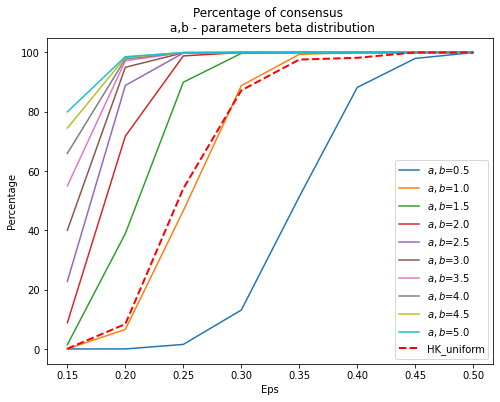

In [41]:
data = []
params = np.arange(0.5, 5.1, 0.5)
epss = np.arange(0.15, 0.51, 0.05)
plt.figure(figsize=(8,6))
for param in params:
    data = []
    for eps in epss:
        data.append(np.load(f'Beta_results/Eps_{round(eps,2)}_param_{round(param,2)}_data.npy')[2]*100)
    plt.plot(epss, data, label=f'$a, b$={round(param,2)}')
HK_sample = [0.1, 8.4, 54.1, 87.2, 97.6, 98.2, 100, 100]
plt.plot(epss, HK_sample, '--', c='r', linewidth=2, label='HK_uniform')
plt.title('Percentage of consensus \n a,b - parameters beta distribution')
plt.xlabel('Eps')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [17]:
np.arange(0.5, 5.1, 0.5)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [11]:
data

[array([0.15, 0.5 , 0.  ]),
 array([1.5e-01, 1.0e+00, 5.0e-04]),
 array([0.15  , 1.5   , 0.0145]),
 array([0.15  , 2.    , 0.0884]),
 array([0.15  , 2.5   , 0.2283]),
 array([0.15  , 3.    , 0.4004]),
 array([0.15  , 3.5   , 0.5501]),
 array([0.15  , 4.    , 0.6596]),
 array([0.15 , 4.5  , 0.745]),
 array([0.15  , 5.    , 0.7998]),
 array([2.e-01, 5.e-01, 1.e-04]),
 array([0.2   , 1.    , 0.0659]),
 array([0.2   , 1.5   , 0.3892]),
 array([0.2   , 2.    , 0.7178]),
 array([0.2   , 2.5   , 0.8888]),
 array([0.2 , 3.  , 0.95]),
 array([0.2   , 3.5   , 0.9721]),
 array([0.2   , 4.    , 0.9782]),
 array([0.2   , 4.5   , 0.9833]),
 array([0.2   , 5.    , 0.9858]),
 array([0.25  , 0.5   , 0.0154]),
 array([0.25  , 1.    , 0.4664]),
 array([0.25  , 1.5   , 0.8996]),
 array([0.25  , 2.    , 0.9884]),
 array([0.25 , 2.5  , 0.998]),
 array([0.25  , 3.    , 0.9988]),
 array([0.25  , 3.5   , 0.9993]),
 array([0.25  , 4.    , 0.9995]),
 array([0.25  , 4.5   , 0.9996]),
 array([0.25  , 5.    , 0.999

In [45]:
print('a,b       Var')
for i in np.arange(0.5, 5.1, 0.5):
    print(i, '    ', round(i*i/((i+i)**2 * (i+i+1)), 4))

a,b       Var
0.5      0.125
1.0      0.0833
1.5      0.0625
2.0      0.05
2.5      0.0417
3.0      0.0357
3.5      0.0312
4.0      0.0278
4.5      0.025
5.0      0.0227
